In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
warnings.simplefilter('ignore')
from IPython.display import display
from scipy.stats import randint
import joblib

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,28386,INN28387,1,0,1,4,Meal Plan 1,0,Room_Type 1,209,2017,7,29,Online,0,0,0,55.96,0,Canceled
1,6537,INN06538,2,0,0,4,Meal Plan 1,0,Room_Type 1,104,2018,7,6,Online,0,0,0,83.12,1,Not_Canceled
2,16939,INN16940,2,1,2,2,Meal Plan 1,0,Room_Type 1,42,2018,8,14,Online,0,0,0,152.10,1,Not_Canceled
3,22120,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled
4,21297,INN21298,3,0,1,4,Meal Plan 1,0,Room_Type 4,79,2018,7,11,Online,0,0,0,139.50,0,Not_Canceled


In [3]:
df.shape

(29020, 20)

In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,1,4,Meal Plan 1,0,Room_Type 1,209,2017,7,29,Online,0,0,0,55.96,0,Canceled
1,2,0,0,4,Meal Plan 1,0,Room_Type 1,104,2018,7,6,Online,0,0,0,83.12,1,Not_Canceled
2,2,1,2,2,Meal Plan 1,0,Room_Type 1,42,2018,8,14,Online,0,0,0,152.10,1,Not_Canceled
3,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled
4,3,0,1,4,Meal Plan 1,0,Room_Type 4,79,2018,7,11,Online,0,0,0,139.50,0,Not_Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df['no_of_adults'].value_counts()

no_of_adults
2    20957
1     6053
3     1892
0      104
4       14
Name: count, dtype: int64

In [9]:
df['no_of_children'].value_counts()

no_of_children
0     26883
1      1296
2       823
3        15
9         2
10        1
Name: count, dtype: int64

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    22480
Room_Type 4     4893
Room_Type 6      752
Room_Type 2      564
Room_Type 5      202
Room_Type 7      125
Room_Type 3        4
Name: count, dtype: int64

In [12]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     28747
1       164
3        36
2        34
11       19
5         8
4         7
13        4
6         1
Name: count, dtype: int64

In [13]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    28115
1      905
Name: count, dtype: int64

In [14]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(7669)

In [16]:
# Remove duplicates and keep the first occurrence
df_cleaned = df.drop_duplicates(keep='first')

In [17]:
# Verify the removal
df_cleaned.duplicated().sum()

np.int64(0)

In [18]:
#Update the original DataFrame
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(21351, 18)

Checking for Data Imbalance
* Data imbalance occurs when the number of observations in one class(eg., 'Cancelled') is significantly lower than the number of observations in the other class (e.g., 'Not Cancelled')

In [21]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15212
Canceled         6139
Name: count, dtype: int64

Identify Numerical Columns and Categorical Columns

In [22]:
# Numerical columns
num_columns = df.select_dtypes(include=np.number).columns.tolist()
num_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [23]:
num_cols = [num_col for num_col in df.select_dtypes(include=np.number).columns]
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [24]:
# Extract Categorical Columns
cat_cols = [cat_col for cat_col in df.select_dtypes(include=['object', 'category', 'bool']).columns]
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21351 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21351 non-null  int64  
 1   no_of_children                        21351 non-null  int64  
 2   no_of_weekend_nights                  21351 non-null  int64  
 3   no_of_week_nights                     21351 non-null  int64  
 4   type_of_meal_plan                     21351 non-null  object 
 5   required_car_parking_space            21351 non-null  int64  
 6   room_type_reserved                    21351 non-null  object 
 7   lead_time                             21351 non-null  int64  
 8   arrival_year                          21351 non-null  int64  
 9   arrival_month                         21351 non-null  int64  
 10  arrival_date                          21351 non-null  int64  
 11  market_segment_type 

Univariate Analysis

In [26]:
data = df.copy()

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,1,4,Meal Plan 1,0,Room_Type 1,209,2017,7,29,Online,0,0,0,55.96,0,Canceled
1,2,0,0,4,Meal Plan 1,0,Room_Type 1,104,2018,7,6,Online,0,0,0,83.12,1,Not_Canceled
2,2,1,2,2,Meal Plan 1,0,Room_Type 1,42,2018,8,14,Online,0,0,0,152.10,1,Not_Canceled
3,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled
4,3,0,1,4,Meal Plan 1,0,Room_Type 4,79,2018,7,11,Online,0,0,0,139.50,0,Not_Canceled


In [28]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

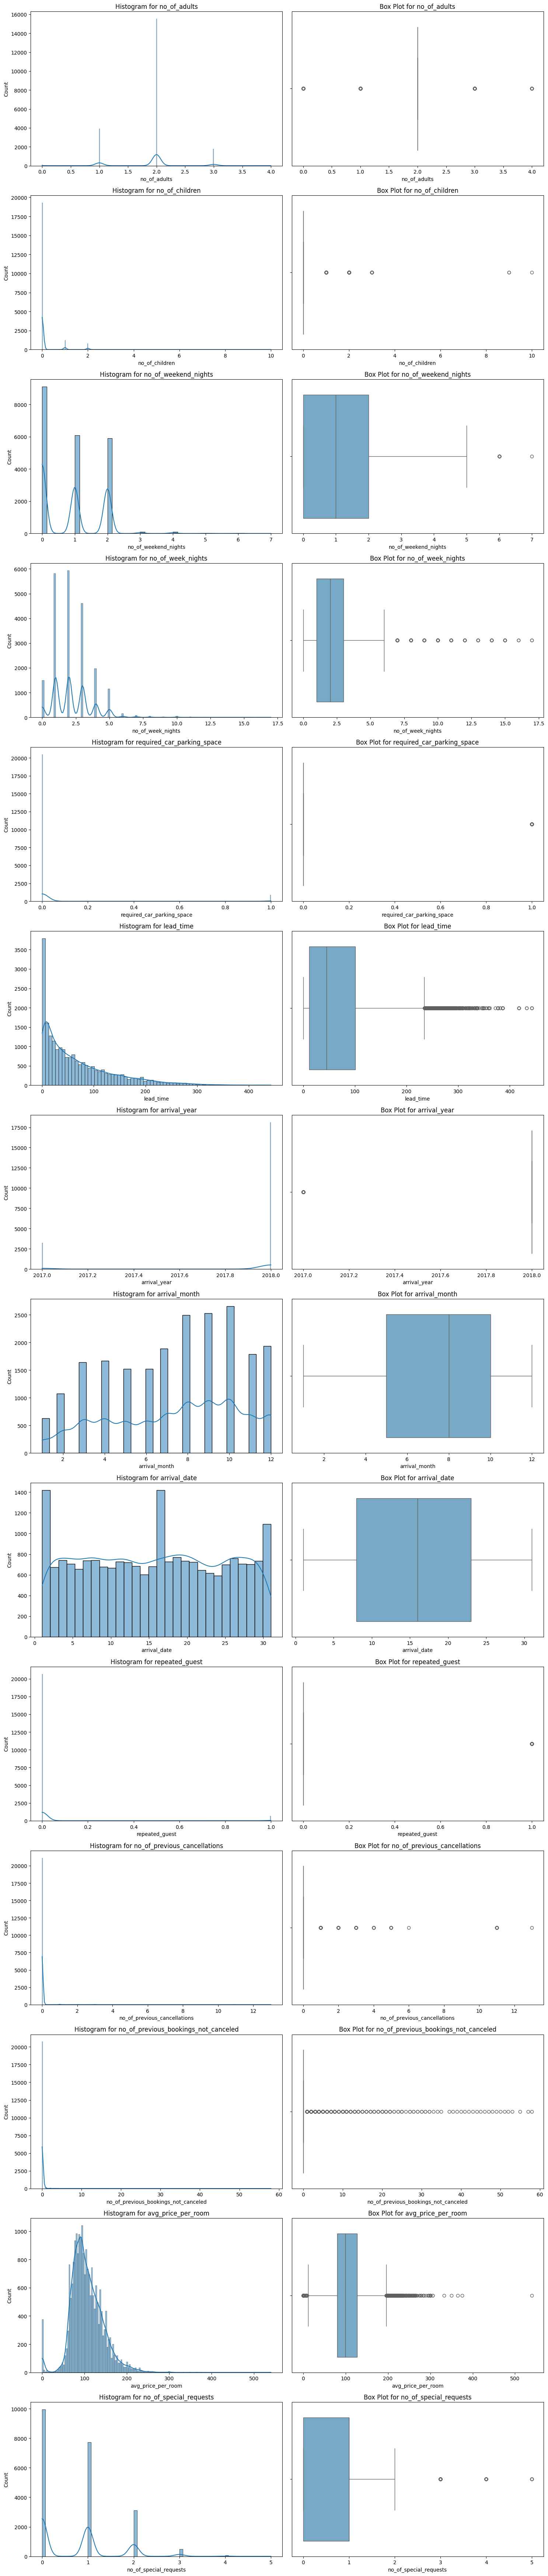

In [29]:
num_plot_dist(data , num_cols)

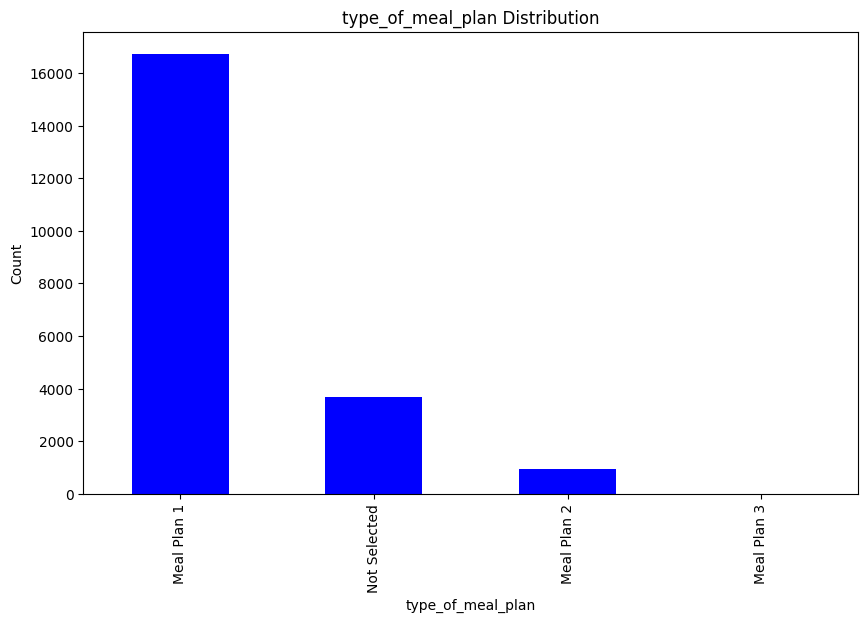

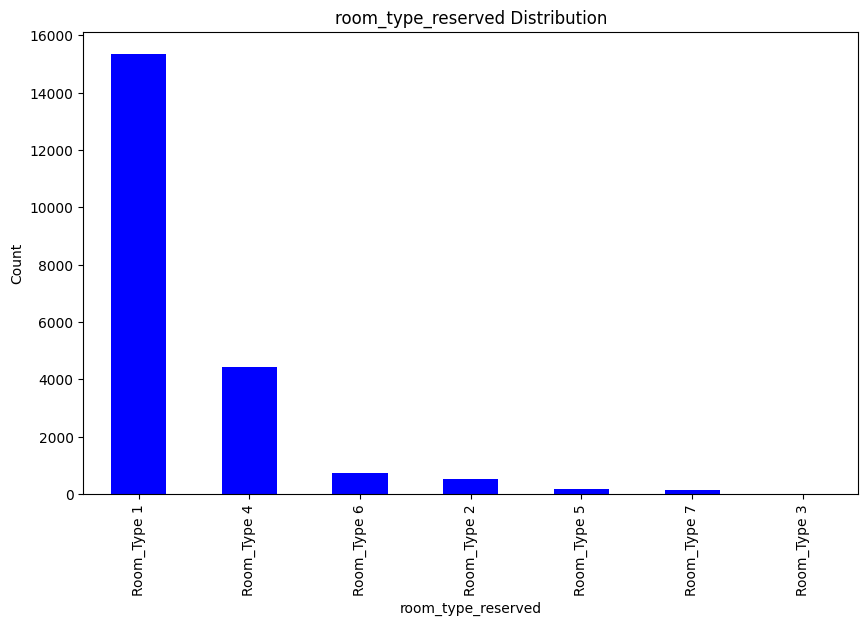

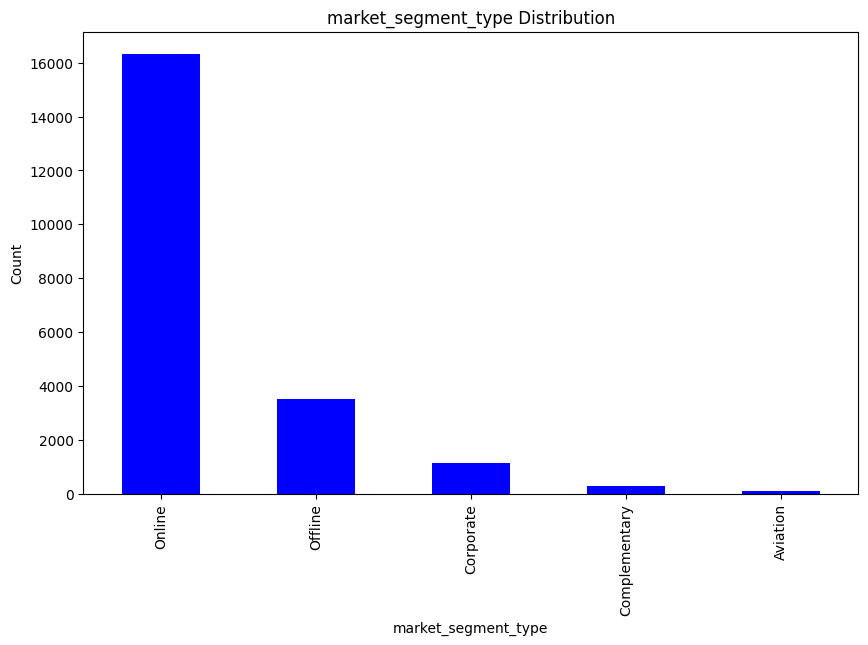

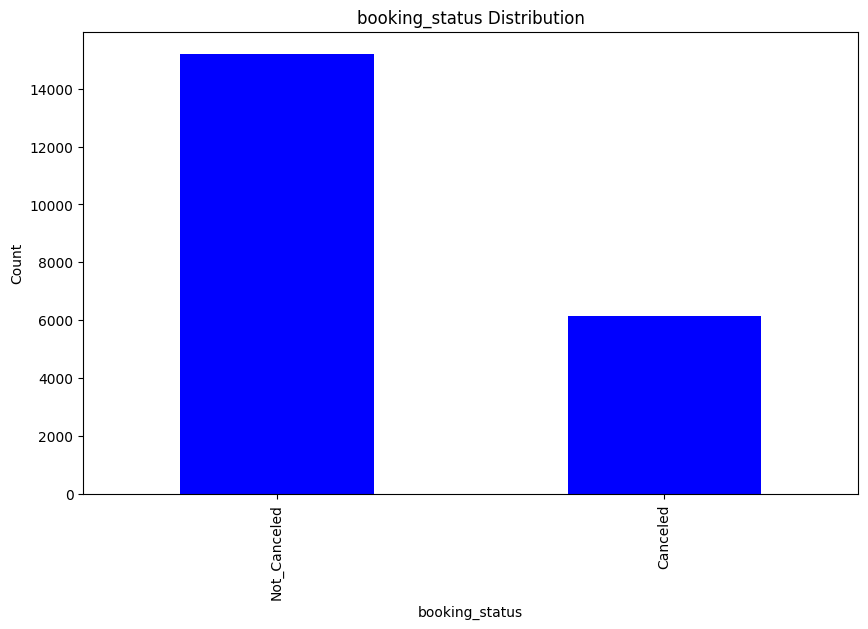

In [30]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='blue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

Data Preprocessing

In [36]:
# Initialize the Encoder
le = LabelEncoder()

#Dictionary to store the fitted encoders for inverse transformation/mapping
encoder_mappings = {}

for col in cat_cols:
    # 1. Robustness: Handle NaN values by filling them with a placeholder
    # LabelEncoder cannot handle np.nan, so this prevents a ValueError
    df[col] = df[col].fillna('___MISSING___')
    
    # Fit and Transform the column
    df[col] = le.fit_transform(df[col])
    
    # Creates a dictionary mapping original label string to new integer code
    encoder_mappings[col] = {
        label:code for label,code in zip(le.classes_ , le.transform(le.classes_))
        }
    
    
    print(f"Encode '{col}' Mapping captured.")
print(encoder_mappings)
print(df['market_segment_type'].unique())

Encode 'type_of_meal_plan' Mapping captured.
Encode 'room_type_reserved' Mapping captured.
Encode 'market_segment_type' Mapping captured.
Encode 'booking_status' Mapping captured.
{'type_of_meal_plan': {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}, 'room_type_reserved': {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6)}, 'market_segment_type': {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}, 'booking_status': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}
[4 3 2 1 0]


In [37]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,1,4,0,0,0,209,2017,7,29,4,0,0,0,55.96,0,0
1,2,0,0,4,0,0,0,104,2018,7,6,4,0,0,0,83.12,1,1
2,2,1,2,2,0,0,0,42,2018,8,14,4,0,0,0,152.10,1,1
3,2,1,0,4,0,0,0,201,2018,11,1,4,0,0,0,82.28,3,1
4,3,0,1,4,0,0,3,79,2018,7,11,4,0,0,0,139.50,0,1


In [38]:
df.shape

(21351, 18)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21351 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21351 non-null  int64  
 1   no_of_children                        21351 non-null  int64  
 2   no_of_weekend_nights                  21351 non-null  int64  
 3   no_of_week_nights                     21351 non-null  int64  
 4   type_of_meal_plan                     21351 non-null  int64  
 5   required_car_parking_space            21351 non-null  int64  
 6   room_type_reserved                    21351 non-null  int64  
 7   lead_time                             21351 non-null  int64  
 8   arrival_year                          21351 non-null  int64  
 9   arrival_month                         21351 non-null  int64  
 10  arrival_date                          21351 non-null  int64  
 11  market_segment_type 

Imbalanced Data

In [40]:
df["booking_status"].value_counts()

booking_status
1    15212
0     6139
Name: count, dtype: int64

In [41]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [42]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [43]:
y.value_counts()

booking_status
1    15212
0     6139
Name: count, dtype: int64

In [45]:
smote = SMOTE(random_state=43)
X_res, y_res = smote.fit_resample(X, y)


In [46]:
y_res

0        0
1        1
2        1
3        1
4        1
        ..
30419    0
30420    0
30421    0
30422    0
30423    0
Name: booking_status, Length: 30424, dtype: int64

In [47]:
y_res.value_counts()

booking_status
0    15212
1    15212
Name: count, dtype: int64

In [49]:
df_balanced  = pd.DataFrame(X_res, columns=X.columns)
df_balanced['booking_status'] = y_res

In [50]:
df_balanced.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,1,4,0,0,0,209,2017,7,29,4,0,0,0,55.96,0,0
1,2,0,0,4,0,0,0,104,2018,7,6,4,0,0,0,83.12,1,1
2,2,1,2,2,0,0,0,42,2018,8,14,4,0,0,0,152.10,1,1
3,2,1,0,4,0,0,0,201,2018,11,1,4,0,0,0,82.28,3,1
4,3,0,1,4,0,0,3,79,2018,7,11,4,0,0,0,139.50,0,1


In [51]:
df_balanced.shape

(30424, 18)

In [52]:
df = df_balanced.copy()

In [53]:
df.shape

(30424, 18)

In [57]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [76]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=43),
    'KNearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=43),
    'Decision Tree': DecisionTreeClassifier(random_state=43),
    'Naive Baye': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(random_state=42)
}

metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

# Evaluate each model
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    


In [77]:
metrics_df= pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.785703,0.788656,0.775050,0.781794
1,KNearest Neighbors,0.776171,0.838802,0.678500,0.750183
2,Random Forest,0.891372,0.887644,0.893829,0.890726
3,Decision Tree,0.832539,0.837792,0.820836,0.829227
4,Naive Baye,0.568940,0.890220,0.147976,0.253770
5,Gradient Boosting,0.841578,0.823752,0.865295,0.844013
6,XGBoost,0.883320,0.878449,0.887193,0.882800
7,LightGBM,0.870994,0.855729,0.889516,0.872295


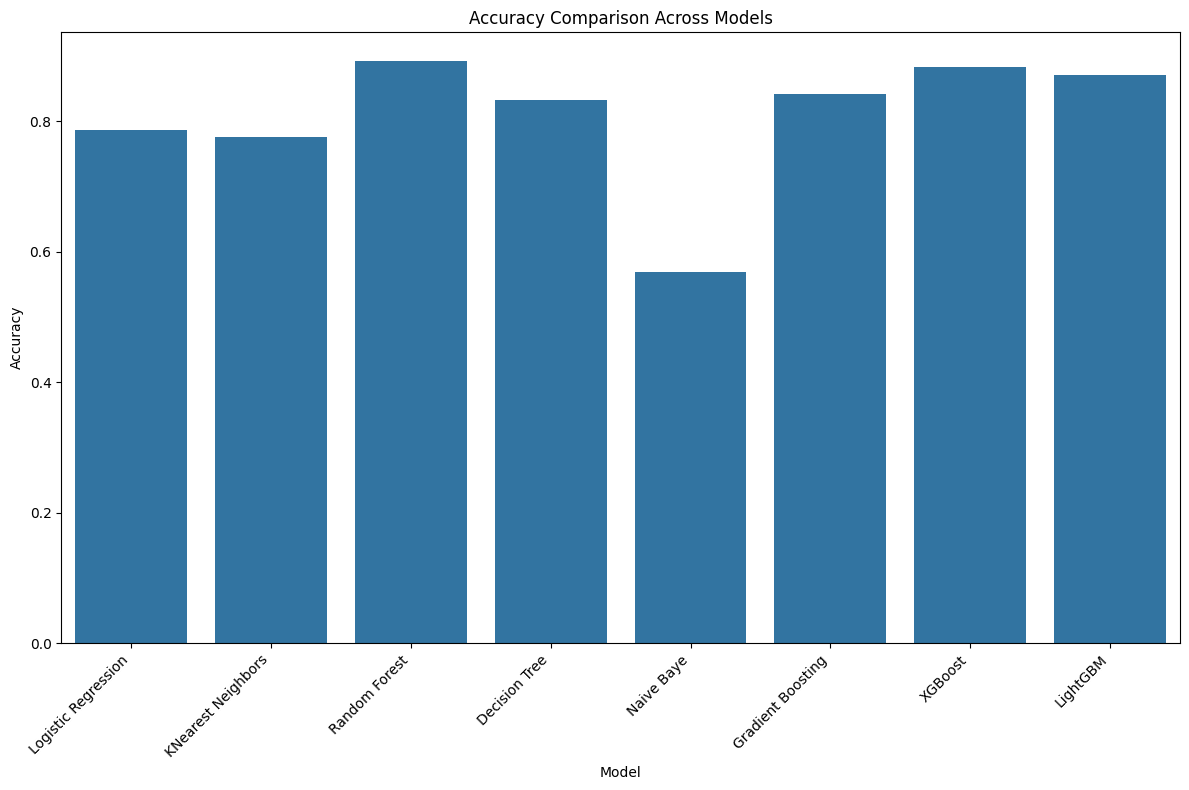

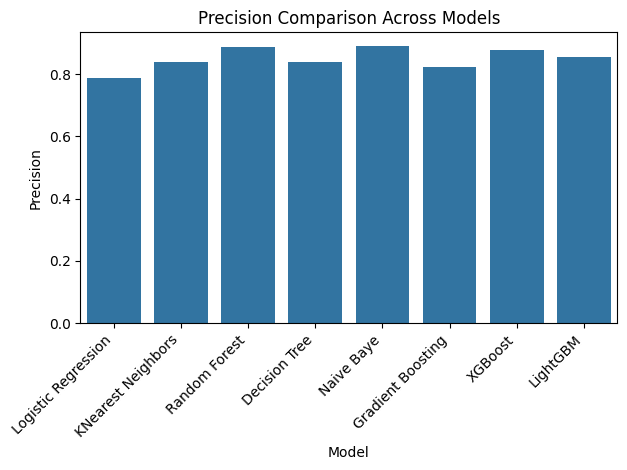

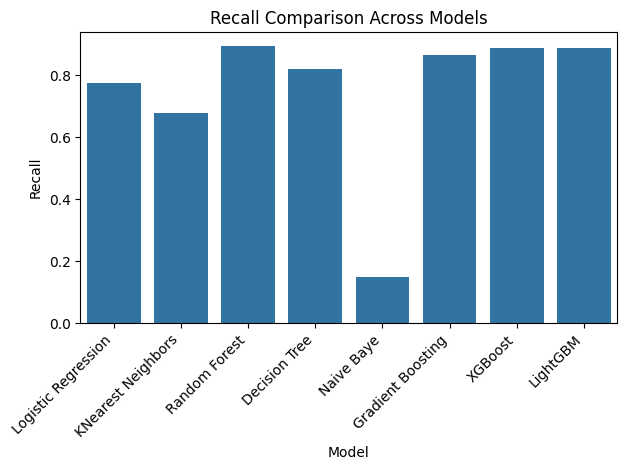

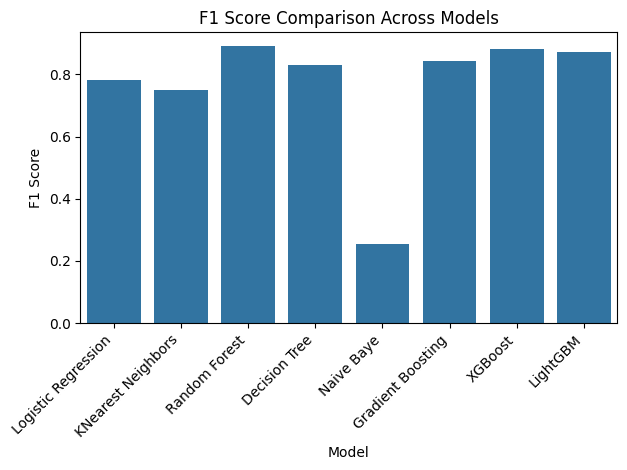

In [78]:
# Plot bar charts
plt.figure(figsize=(12, 8))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

In [82]:
#Train Random Forest Classifier

X = df.drop(columns='booking_status')
y = df["booking_status"]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [83]:
rf = RandomForestClassifier(random_state=42)
rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
params = {
    'n_estimators': randint(10, 500),
    'max_depth': randint(10, 500),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]

}

In [95]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=43,
    scoring='accuracy'
)

In [96]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV] END bootstrap=True, max_depth=330, min_samples_leaf=4, min_samples_split=3, n_estimators=287; total time=  14.3s
[CV] END bootstrap=True, max_depth=330, min_samples_leaf=4, min_samples_split=3, n_estimators=287; total time=  12.8s
[CV] END bootstrap=True, max_depth=330, min_samples_leaf=4, min_samples_split=3, n_estimators=287; total time=  11.8s
[CV] END bootstrap=True, max_depth=330, min_samples_leaf=4, min_samples_split=3, n_estimators=287; total time=   9.3s
[CV] END bootstrap=True, max_depth=330, min_samples_leaf=4, min_samples_split=3, n_estimators=287; total time=   9.6s
[CV] END bootstrap=True, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=197; total time=   7.2s
[CV] END bootstrap=True, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=197; total time=   6.4s
[CV] END bootstrap=True, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=197; total time=   7.7s
[CV] END bootstrap=True, max_depth=26, min_samples_leaf=4, 

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0025E4724D2B0>, 'min_samples_leaf': <scipy.stats....0025E471F1F10>, 'min_samples_split': <scipy.stats....0025E445D4940>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,43
,error_score,nan


In [97]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 460,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 353}

In [98]:
best_rf_model = random_search.best_estimator_

In [99]:
y_pred = best_rf_model.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [103]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')

Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1: 0.89


Save the model

In [105]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [106]:
loaded_model = joblib.load('random_forest.pkl')

In [110]:
X_train[:1]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
19000,2,2,2,1,0,0,5,109,2018,10,29,4,0,0,0,159.9,0


In [117]:
#Test the model using unseen data
#new_data = np.array([200, 1, 112.4, 7, 8, 6, 8,	1, 0, 0]).reshape(1,-1)
new_data = np.array([21039,1,0,1,1,0,1,4,2018,1,2,1,0,0,0,97.0,2]).reshape(1, -1)

In [119]:
predictions=loaded_model.predict(new_data)
predictions

array([1])

In [ ]:
Not_Canceled